In [1]:
import numpy as np
import matplotlib.pyplot as plt

from glacier import *
from tributary import *

Created tributary at y=4000.00
Created tributary at y=3000.00
Created tributary at y=2000.00


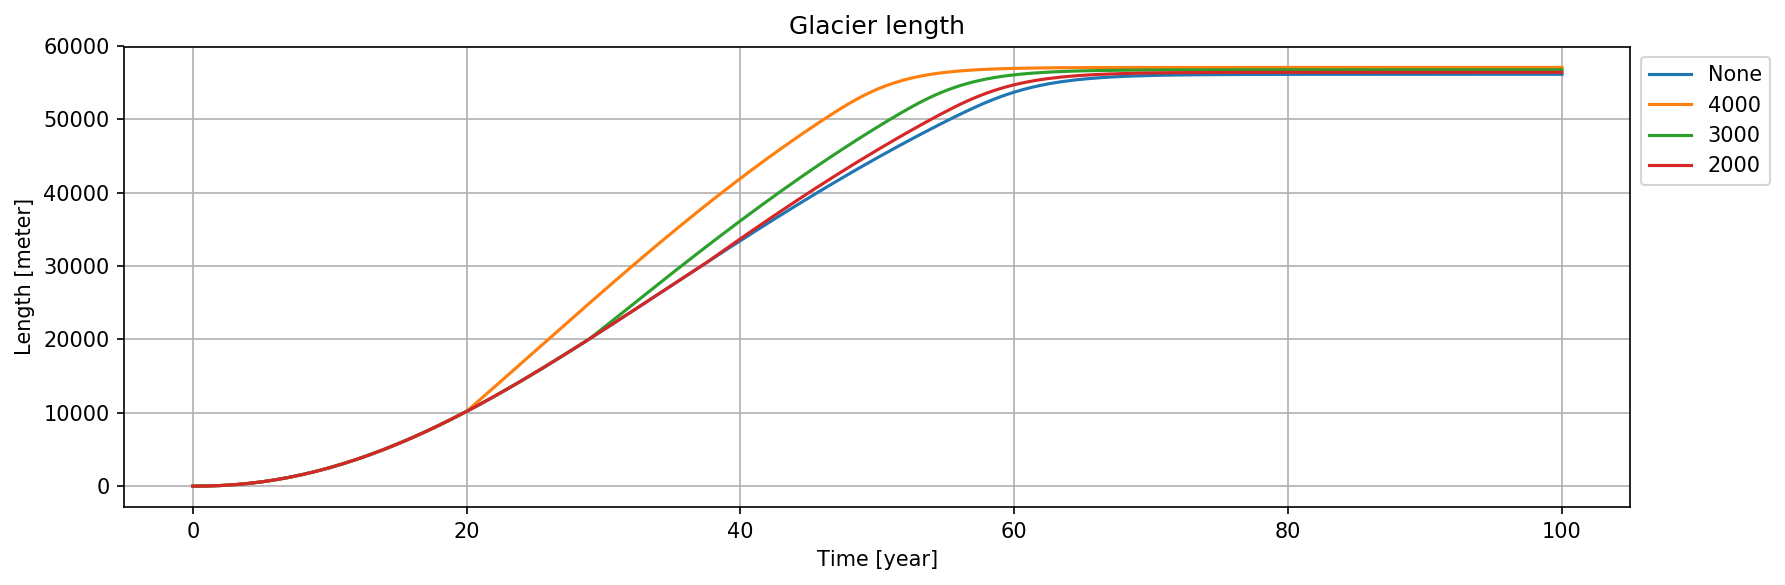

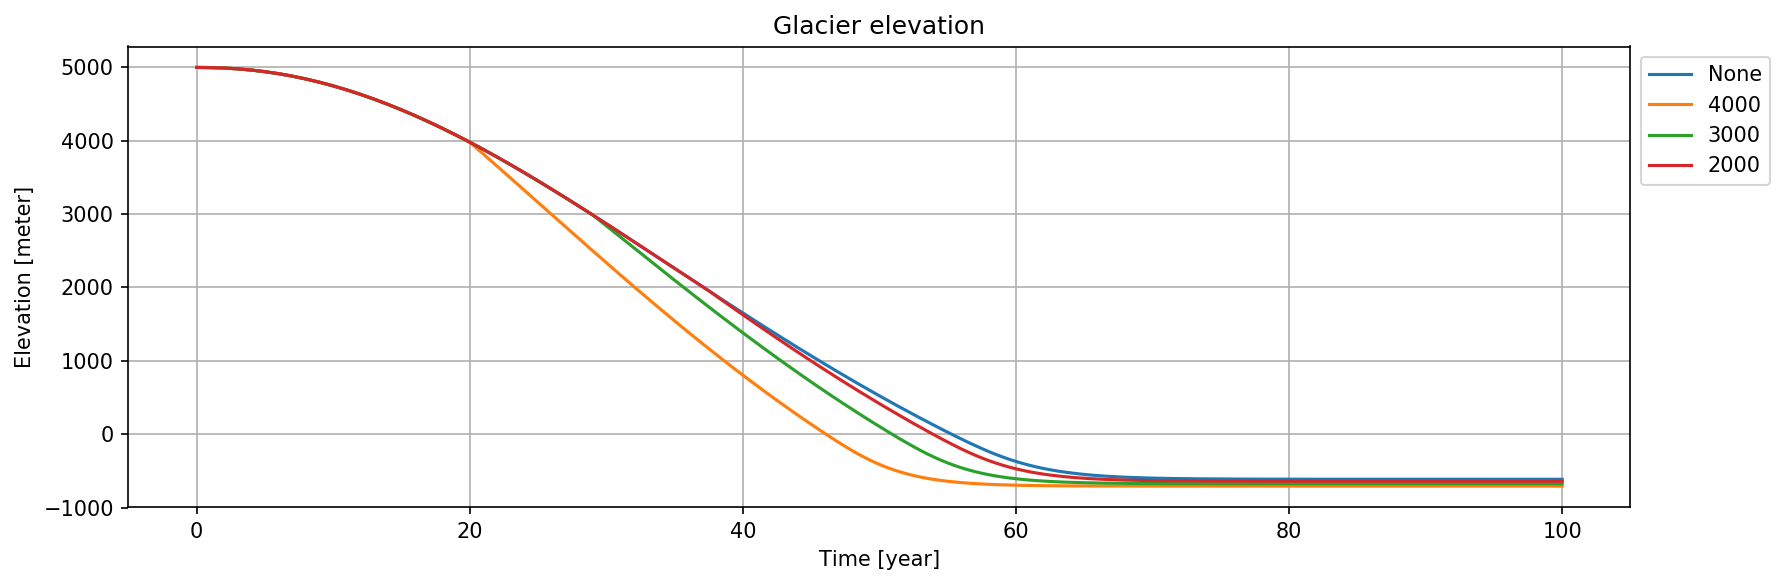

In [2]:
### Effect of a tributary
b0 = 5000
s = 0.1
E = 1500

a = LinearBedModel(b0=b0, s=s, E=E)
b = LinearBedModel(b0=b0, s=s, E=E)
c = LinearBedModel(b0=b0, s=s, E=E)
d = LinearBedModel(b0=b0, s=s, E=E)

glaciers = [a,b,c,d]

b.add_bucket_tributary(L=1e3, w0=5, w1=10, h0=4000, h1=4500, show=True)
c.add_bucket_tributary(L=1e3, w0=5, w1=10, h0=3000, h1=3500, show=True)
d.add_bucket_tributary(L=1e3, w0=5, w1=10, h0=2000, h1=2500, show=True)

for glacier in glaciers:
    glacier.integrate(dt=0.5, time=100.)

    
    
plt.figure(figsize=(12,4), dpi=150)       
    
plt.plot(a.t, a.L, label="None")
plt.plot(b.t, b.L, label="4000")
plt.plot(c.t, c.L, label="3000")
plt.plot(d.t, d.L, label="2000")

plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.title("Glacier length")
plt.xlabel("Time [year]")
plt.ylabel("Length [meter]")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4), dpi=150)       
    
plt.plot(a.t, a.bed(a.L), label="None")
plt.plot(b.t, b.bed(b.L), label="4000")
plt.plot(c.t, c.bed(c.L), label="3000")
plt.plot(d.t, d.bed(d.L), label="2000")

plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.title("Glacier elevation")
plt.xlabel("Time [year]")
plt.ylabel("Elevation [meter]")
plt.tight_layout()
plt.show()

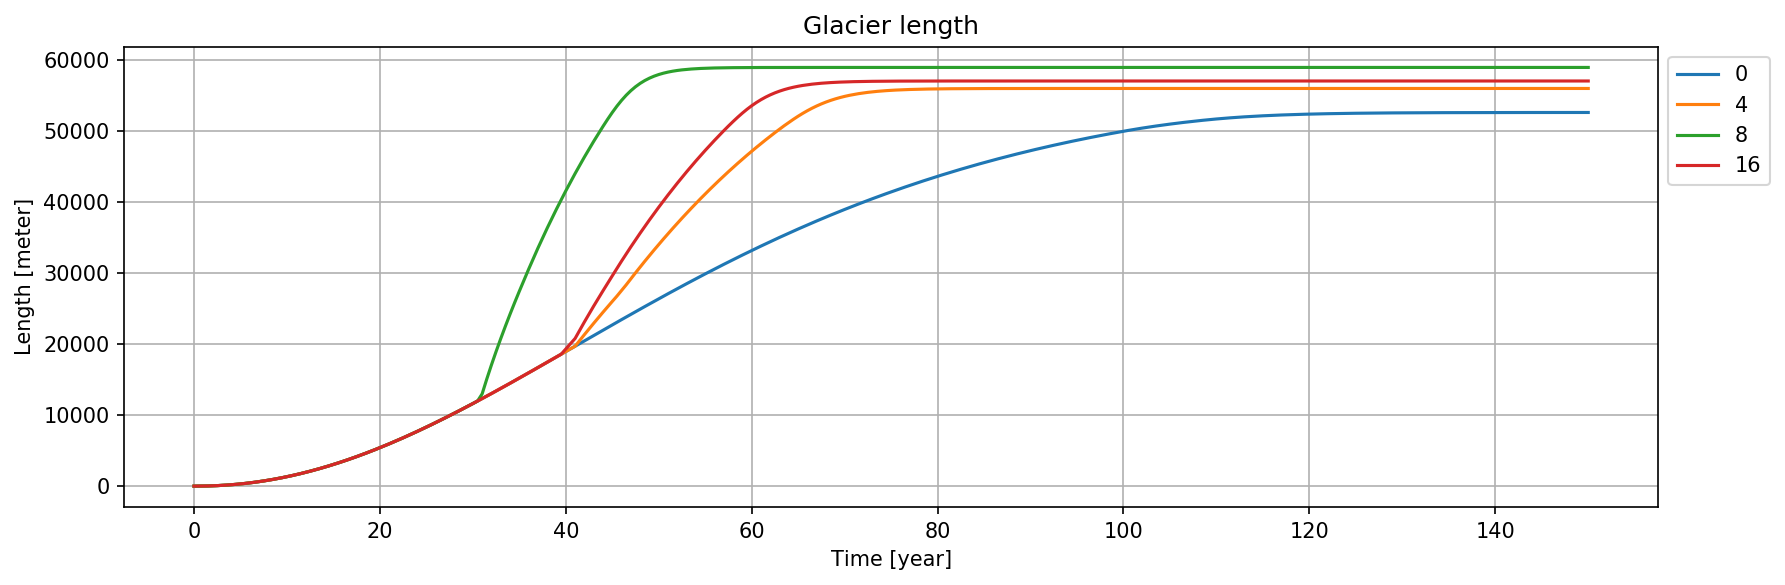

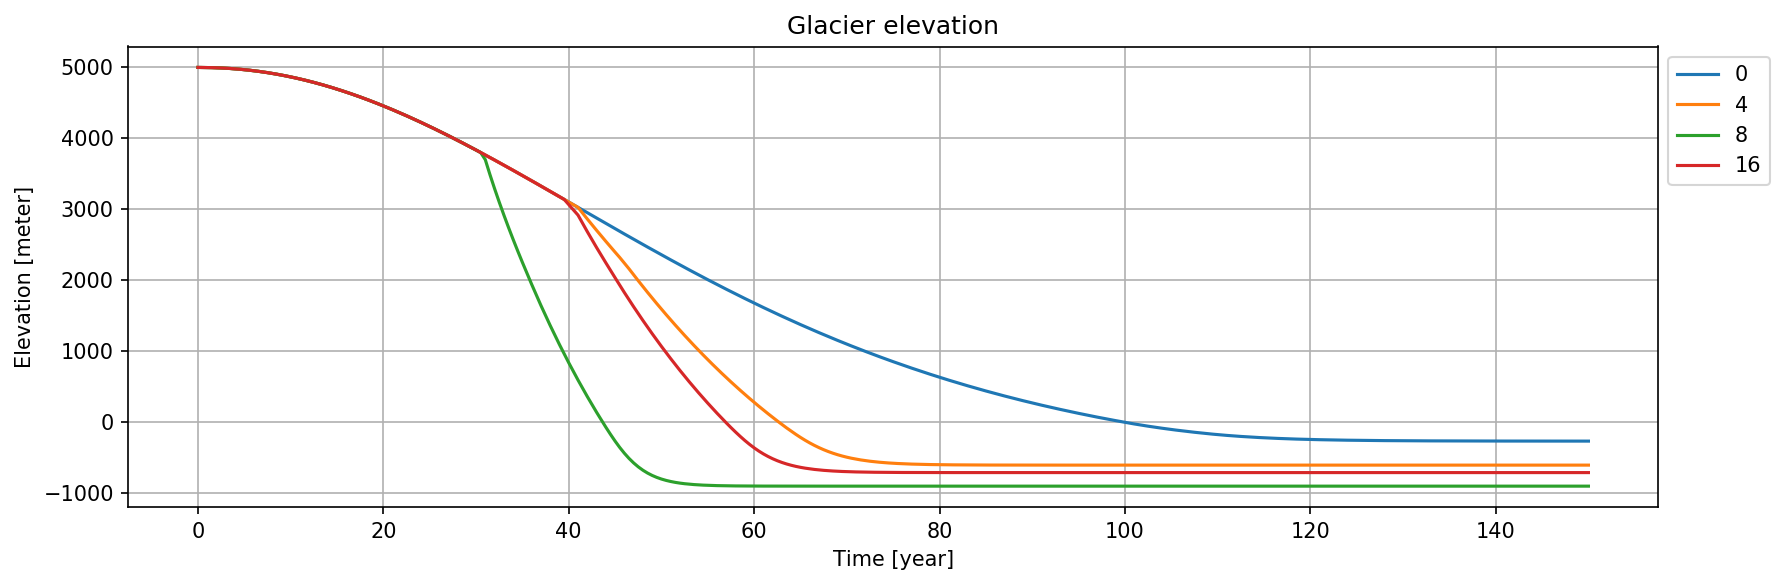

In [3]:
### Effect of multiple tributaries (random placement)
nb = 4
nc = 8
nd = 16


b0 = 5000
s = 0.1
E = 2500

a = LinearBedModel(b0=b0, s=s, E=E)
b = LinearBedModel(b0=b0, s=s, E=E)
c = LinearBedModel(b0=b0, s=s, E=E)
d = LinearBedModel(b0=b0, s=s, E=E)

glaciers = [a,b,c,d]

#b
for _ in range(nb):
    L = np.int(1e3 + 9e3*np.random.rand(1))
    w = np.int(5 + 5*np.random.rand(1))
    dw = np.int(5*np.random.rand(1))
    y = np.int(4e3*np.random.rand(1))
    dy = np.int(0.5e3 + 0.5e3*np.random.rand(1))

    b.add_bucket_tributary(L=L, w0=w, w1=w+dw, h0=y, h1=y+dy, show=False)

#c
for _ in range(nc):
    L = np.int(1e3 + 9e3*np.random.rand(1))
    w = np.int(5 + 5*np.random.rand(1))
    dw = np.int(5*np.random.rand(1))
    y = np.int(4e3*np.random.rand(1))
    dy = np.int(0.5e3 + 0.5e3*np.random.rand(1))

    c.add_bucket_tributary(L=L, w0=w, w1=w+dw, h0=y, h1=y+dy, show=False)
    
#d
for _ in range(nd):
    L = np.int(1e3 + 9e3*np.random.rand(1))
    w = np.int(5 + 5*np.random.rand(1))
    dw = np.int(5*np.random.rand(1))
    y = np.int(4e3*np.random.rand(1))
    dy = np.int(0.5e3 + 0.5e3*np.random.rand(1))

    d.add_bucket_tributary(L=L, w0=w, w1=w+dw, h0=y, h1=y+dy, show=False)
    
for glacier in glaciers:
    glacier.integrate(dt=0.5, time=150.)
    
    
    
plt.figure(figsize=(12,4), dpi=150)       
    
plt.plot(a.t, a.L, label=0)
plt.plot(b.t, b.L, label=nb)
plt.plot(c.t, c.L, label=nc)
plt.plot(d.t, d.L, label=nd)

plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.title("Glacier length")
plt.xlabel("Time [year]")
plt.ylabel("Length [meter]")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4), dpi=150)       
    
plt.plot(a.t, a.bed(a.L), label=0)
plt.plot(b.t, b.bed(b.L), label=nb)
plt.plot(c.t, c.bed(c.L), label=nc)
plt.plot(d.t, d.bed(d.L), label=nd)

plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.title("Glacier elevation")
plt.xlabel("Time [year]")
plt.ylabel("Elevation [meter]")
plt.tight_layout()
plt.show()